In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## We will be predicting the AvgTemp values using Linear Regression

In [ ]:
df = pd.read_csv("/content/MaunaLoaDailyTemps.csv", index_col = "DATE", parse_dates = True)
df

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


In [ ]:
df.dtypes

MinTemp    float64
MaxTemp    float64
AvgTemp    float64
Sunrise      int64
Sunset       int64
dtype: object

In [ ]:
df.isna().sum()

MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64

In [ ]:
df.dropna(axis = 0, inplace = True)
df.isna().sum()

MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [ ]:
df.corr()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
MinTemp,1.000000,0.756071,0.917456,-0.426821,0.300492
MaxTemp,0.756071,1.000000,0.951039,-0.374928,0.275876
AvgTemp,0.917456,0.951039,1.000000,-0.422829,0.304711
Sunrise,-0.426821,-0.374928,-0.422829,1.000000,-0.739777
Sunset,0.300492,0.275876,0.304711,-0.739777,1.000000


<Axes: xlabel='DATE'>

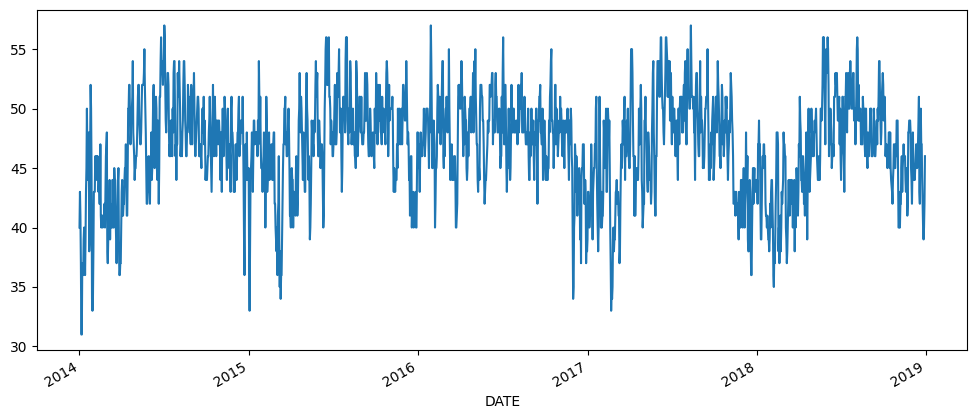

In [ ]:
df["AvgTemp"].plot(figsize = (12, 5))

<Axes: >

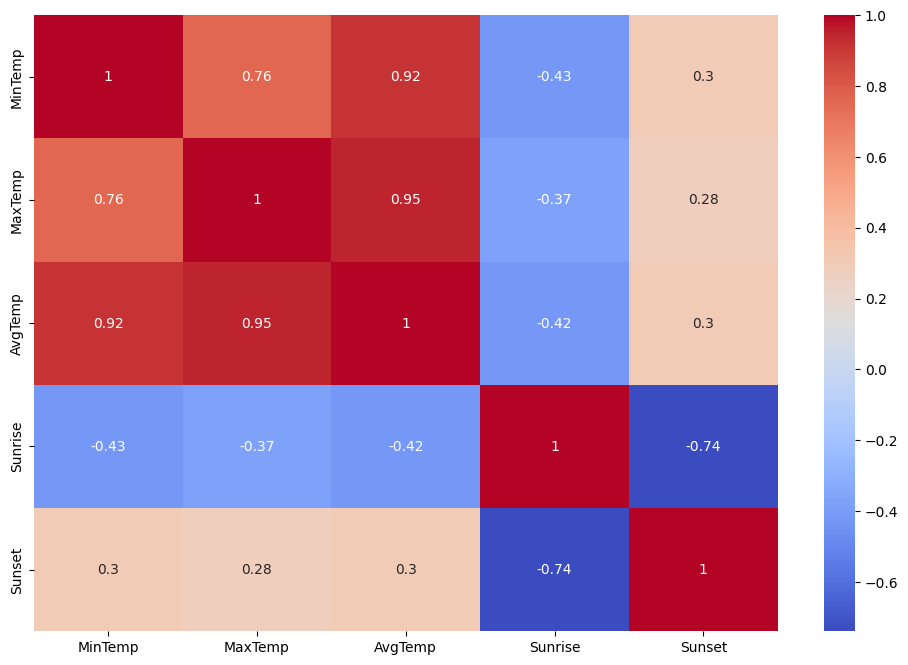

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")

In [ ]:
X_columns = df[['MinTemp', 'MaxTemp', 'Sunrise', 'Sunset']]
X = X_columns
y = df['AvgTemp']
print(X.shape)
print(y.shape)

(1821, 4)
(1821,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1456, 4)
(1456,)
(365, 4)
(365,)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

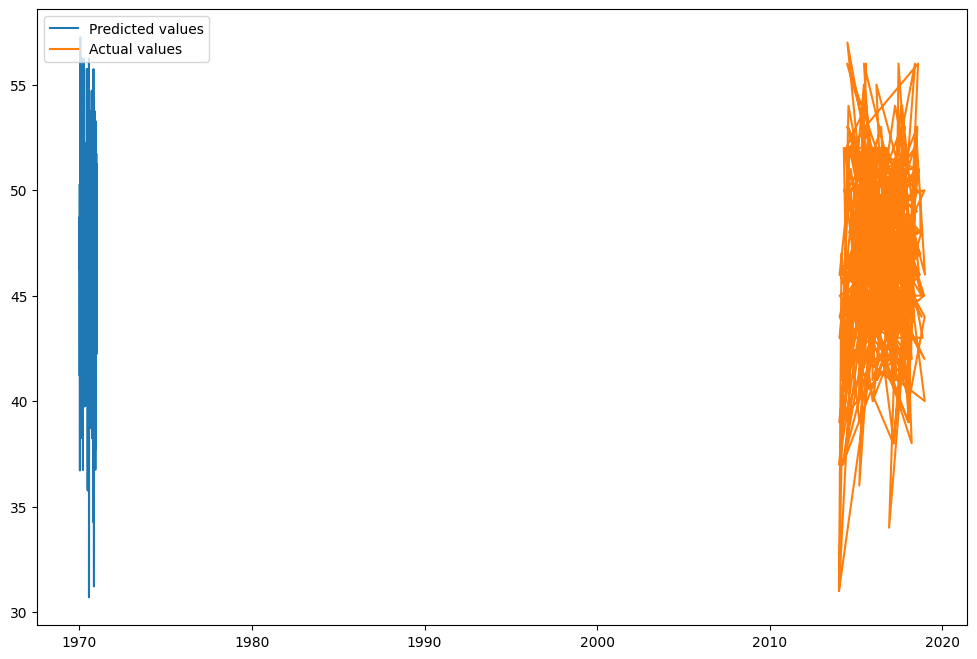

In [ ]:
pred = model.predict(X_test)
plt.figure(figsize = (12, 8))
plt.plot(pred, label = "Predicted values")
plt.plot(y_test, label = "Actual values")
plt.legend(loc = "upper left")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,y_test))
print(rmse)

0.25114587901677893


## Getting lower value of RMSE than ARIMA model due to the fact that there exists a good linear relationship between the target values and features.Hence using Linear Regression will be a better option for this dataset

In [ ]:
index_future_dates = pd.date_range(start = "2018-12-30", end = "2019-3-30")
future_features = pd.DataFrame(index=index_future_dates)
for feature in df.columns:
    future_features['MinTemp_lag1'] = df['MinTemp'].shift(1)
    future_features['MaxTemp_lag1'] = df['MaxTemp'].shift(1)
    future_features['Sunrise_lag1'] = df['Sunrise'].shift(1)
    future_features['Sunset_lag1'] = df['Sunset'].shift(1)



future_features

,MinTemp_lag1,MaxTemp_lag1,Sunrise_lag1,Sunset_lag1
2018-12-30,36.0,47.0,655.0,1753.0
2018-12-31,NaN,NaN,NaN,NaN
2019-01-01,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,NaN,NaN,NaN,NaN
...,...,...,...,...
2019-03-26,NaN,NaN,NaN,NaN
2019-03-27,NaN,NaN,NaN,NaN
2019-03-28,NaN,NaN,NaN,NaN
2019-03-29,NaN,NaN,NaN,NaN
